In [1]:
import librosa
import sounddevice as sd
from scipy.io.wavfile import write

In [2]:
# Record audio
# sr = 44100
# time = 2 #sec
# rec1 = sd.rec(int(time*sr), samplerate = sr, channels = 2)
# sd.wait()
# write('r2.wav',sr,rec1)

In [17]:
import os
os.getcwd()
path = '/home/shweta/projects/DSP/1.wav'

In [18]:
#load audio
x, sr = librosa.load(path, sr = None, mono = True, offset = 0.0)
print(len(x), sr)

190590 48000


In [19]:
x

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0517578e-05,
       6.1035156e-05, 6.1035156e-05], dtype=float32)

In [20]:
#Duration of speech 
d = 158558/ 48000
int(d)

3

In [21]:
from IPython.display import Audio
Audio('/home/shweta/projects/DSP/audio.wav')

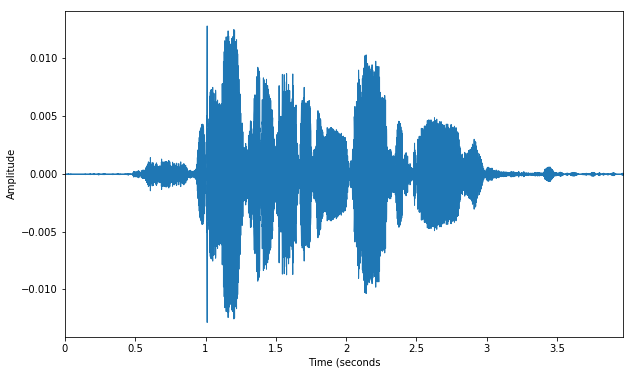

In [22]:
#plot
import matplotlib.pyplot as plt
from librosa import display
plt.figure(figsize = (10,6))
librosa.display.waveplot(y = x,sr = sr)
plt.xlabel("Time (seconds")
plt.ylabel("Amplitude")
plt.show()

This isn't very informative as it is showing only loudness varying with time.
So, it becomes necesary to transform it into the frequency domain

# FFT

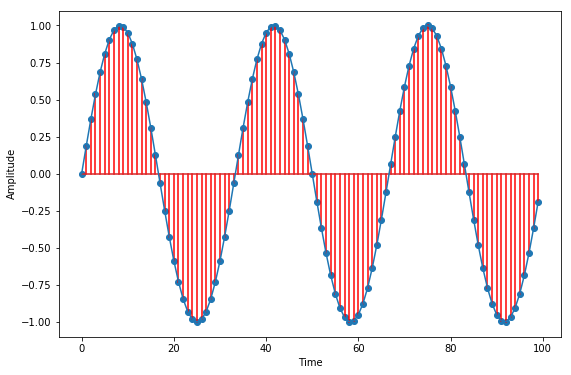

In [9]:
import numpy as np
import pandas as pd
#create a sine wave with a sampling rate of 100, frequency = 3
#The discrete amptitude values then obtained are used to calculate DFT

samples = 100
f = 3
x = np.arange(samples)
y1 = np.sin(2*np.pi*f * (x/samples)) #created
#plot the sin wave
plt.figure(figsize =(9,6)) 
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [11]:
# FFT Algorithm
import scipy
def fft_plot(audio, s_rate):
    n = len(audio)
    t = 1/s_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0,1.0/(2.0 * t), n/2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    return plt.show()

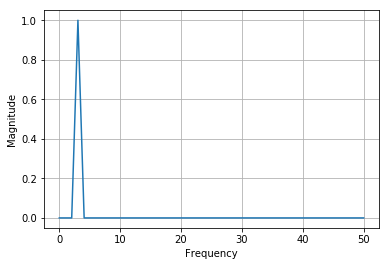

In [12]:
fft_plot(y1,100)

In [13]:
t = 1/sr
n = len(y1)
xf = np.linspace(0.0,1.0/(2.0 * t), n/2)
xf

array([    0.        ,   489.79591837,   979.59183673,  1469.3877551 ,
        1959.18367347,  2448.97959184,  2938.7755102 ,  3428.57142857,
        3918.36734694,  4408.16326531,  4897.95918367,  5387.75510204,
        5877.55102041,  6367.34693878,  6857.14285714,  7346.93877551,
        7836.73469388,  8326.53061224,  8816.32653061,  9306.12244898,
        9795.91836735, 10285.71428571, 10775.51020408, 11265.30612245,
       11755.10204082, 12244.89795918, 12734.69387755, 13224.48979592,
       13714.28571429, 14204.08163265, 14693.87755102, 15183.67346939,
       15673.46938776, 16163.26530612, 16653.06122449, 17142.85714286,
       17632.65306122, 18122.44897959, 18612.24489796, 19102.04081633,
       19591.83673469, 20081.63265306, 20571.42857143, 21061.2244898 ,
       21551.02040816, 22040.81632653, 22530.6122449 , 23020.40816327,
       23510.20408163, 24000.        ])

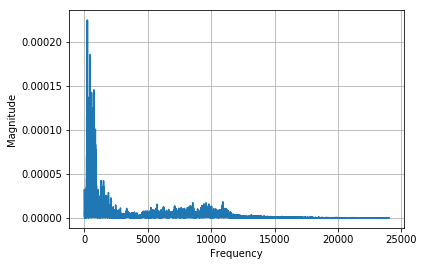

In [23]:
#check out the FFT of our speech signal
audio = '/home/shweta/projects/DSP/audio.wav'
fft_plot(x, 48000)